In [119]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [121]:
df = pd.read_csv("dataset.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [123]:
df.shape 

(112634, 17)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [127]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [129]:
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [131]:
df.rename(columns={"Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility":"CAFV__Eligibility"}, inplace=True)

In [133]:
df

,VIN_(1-10),County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,CAFV__Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.0,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007


In [135]:
df.isnull().sum()

VIN_(1-10)                 0
County                     0
City                       0
State                      0
Postal_Code                0
Model_Year                 0
Make                       0
Model                     20
Electric_Vehicle_Type      0
CAFV__Eligibility          0
Electric_Range             0
Base_MSRP                  0
Legislative_District     286
DOL_Vehicle_ID             0
Vehicle_Location          24
Electric_Utility         443
2020_Census_Tract          0
dtype: int64

In [137]:
df_dropna = df.dropna()

df_dropna

,VIN_(1-10),County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,CAFV__Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.0,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007


In [139]:
df_dropna.isnull().sum()
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112152 entries, 2 to 112633
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN_(1-10)             112152 non-null  object 
 1   County                 112152 non-null  object 
 2   City                   112152 non-null  object 
 3   State                  112152 non-null  object 
 4   Postal_Code            112152 non-null  int64  
 5   Model_Year             112152 non-null  int64  
 6   Make                   112152 non-null  object 
 7   Model                  112152 non-null  object 
 8   Electric_Vehicle_Type  112152 non-null  object 
 9   CAFV__Eligibility      112152 non-null  object 
 10  Electric_Range         112152 non-null  int64  
 11  Base_MSRP              112152 non-null  int64  
 12  Legislative_District   112152 non-null  float64
 13  DOL_Vehicle_ID         112152 non-null  int64  
 14  Vehicle_Location       112152 non-null  o

In [141]:
df["Electric_Vehicle_Type"].value_counts()

Electric_Vehicle_Type
Battery Electric Vehicle (BEV)            86044
Plug-in Hybrid Electric Vehicle (PHEV)    26590
Name: count, dtype: int64

In [143]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [145]:
numerical_df

,Postal_Code,Model_Year,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,2020_Census_Tract
0,33040,2022,42,0,NaN,198968248,12087972100
1,89029,2013,38,0,NaN,5204412,32003005702
2,98901,2011,73,0,15.0,218972519,53077001602
3,98237,2017,238,0,39.0,186750406,53057951101
4,98201,2019,26,0,38.0,2006714,53061041500
...,...,...,...,...,...,...,...
112629,98019,2022,0,0,45.0,217955265,53033032401
112630,98250,2019,150,0,40.0,103663227,53055960301
112631,98070,2022,38,0,34.0,193878387,53033027702
112632,98042,2018,26,0,47.0,125039043,53033032007


In [147]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [149]:
discrete_univariate_analysis(discrete_df)

********** VIN_(1-10) **********
count                                                 112634
nunique                                                 7548
unique     [JTMEB3FV6N, 1G1RD6E45D, JN1AZ0CP8B, 1G1FW6S08...
Name: VIN_(1-10), dtype: object
Value Counts: 
 VIN_(1-10)
5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
             ... 
WA1LAAGE9M      1
5UXKT0C50H      1
5YJYGAED3M      1
WDC0G5DBXL      1
YV4ED3GM0P      1
Name: count, Length: 7548, dtype: int64

********** County **********
count                                                 112634
nunique                                                  165
unique     [Monroe, Clark, Yakima, Skagit, Snohomish, Isl...
Name: County, dtype: object
Value Counts: 
 County
King          59000
Snohomish     12434
Pierce         8535
Clark          6689
Thurston       4126
              ...  
Pinal             1
Elmore            1
Portsmouth        1
Kings             1
Kootenai          1
Nam

In [150]:
df.shape 

(112634, 17)

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

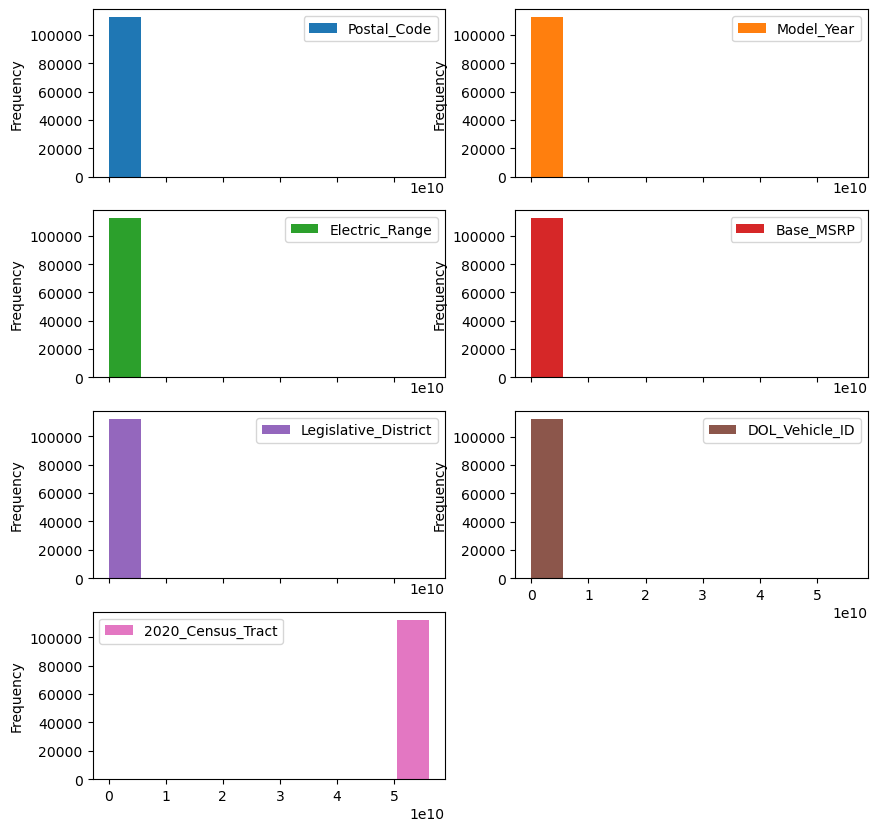

In [153]:
df.plot(kind='hist', subplots=True, layout=(4, 2), figsize=(10, 10))

<Axes: xlabel='Model_Year', ylabel='Electric_Range'>

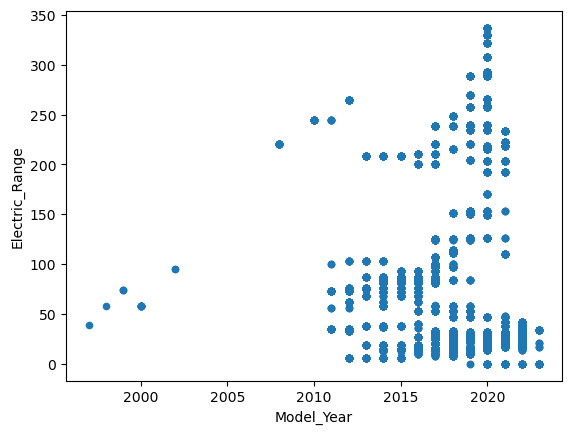

In [154]:
df.plot(kind='scatter', x='Model_Year',y='Electric_Range')

<Axes: xlabel='Model_Year', ylabel='Base_MSRP'>

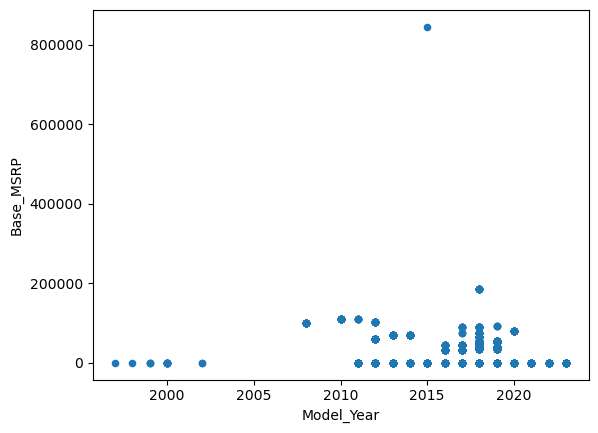

In [155]:
df.plot(kind='scatter', x='Model_Year',y='Base_MSRP')

<Axes: xlabel='Model_Year', ylabel='Base_MSRP'>

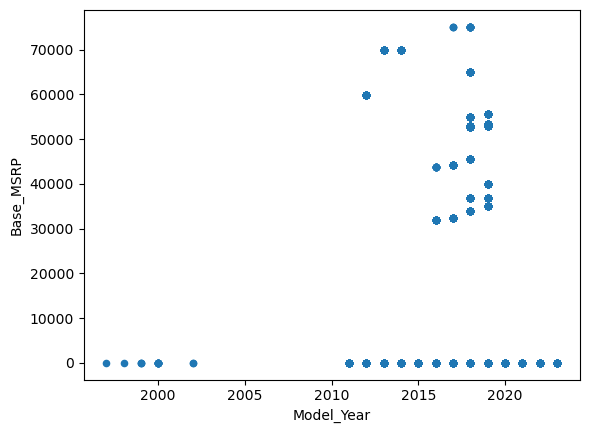

In [156]:
df = df.loc[(df['Base_MSRP'] < 80000)]

df.plot(kind='scatter', x='Model_Year',y='Base_MSRP')

In [157]:
pd.crosstab(df['Electric_Utility'],df['Electric_Vehicle_Type'])

Electric_Vehicle_Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Electric_Utility,,
AVISTA CORP,151,84
"BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||BIG BEND ELECTRIC COOP, INC",21,11
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY,1150,525
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||PUD NO 1 OF ASOTIN COUNTY,28,17
BONNEVILLE POWER ADMINISTRATION||BENTON RURAL ELECTRIC ASSN,0,3
...,...,...
PUD NO 1 OF WHATCOM COUNTY,22,13
PUD NO 2 OF GRANT COUNTY,226,108
PUGET SOUND ENERGY INC,16695,5457


In [158]:
pd.crosstab(df['Model_Year'],df['Electric_Vehicle_Type'])

Electric_Vehicle_Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Model_Year,,
1997,1,0
1998,1,0
1999,3,0
2000,10,0
2002,2,0
2011,762,71
2012,814,871
2013,3018,1673
2014,1864,1821


In [159]:
pd.crosstab(df['CAFV__Eligibility'],df['Electric_Vehicle_Type'])

Electric_Vehicle_Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
CAFV__Eligibility,,
Clean Alternative Fuel Vehicle Eligible,46745,11820
Eligibility unknown as battery range has not been researched,39236,0
Not eligible due to low battery range,9,14688


In [160]:
pd.crosstab(df['Model_Year'],df['CAFV__Eligibility'])

CAFV__Eligibility,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not been researched,Not eligible due to low battery range
Model_Year,,,
1997,1,0,0
1998,1,0,0
1999,3,0,0
2000,10,0,0
2002,2,0,0
2011,833,0,0
2012,1310,0,375
2013,3836,0,855
2014,2896,0,789


<Axes: xlabel='CAFV__Eligibility'>

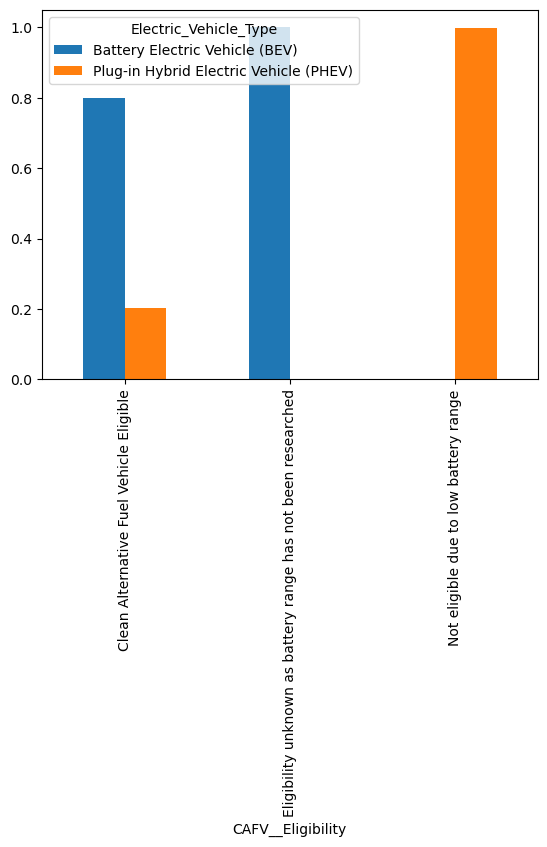

In [162]:
tab = pd.crosstab(df['CAFV__Eligibility'], df['Electric_Vehicle_Type'], normalize='index')

tab.plot(kind='bar')

<Axes: xlabel='Model_Year'>

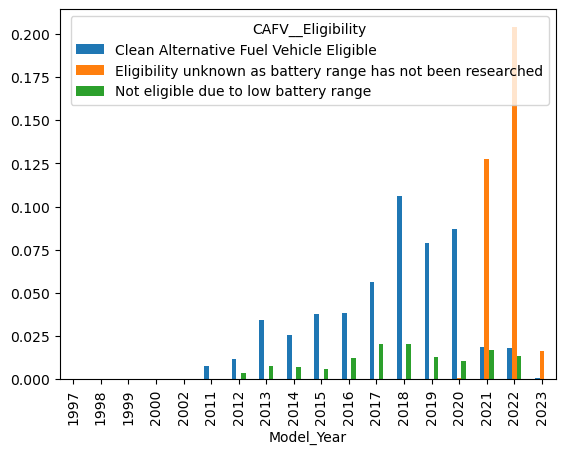

In [163]:
tab = pd.crosstab(df['Model_Year'],df['CAFV__Eligibility'], normalize= True)

tab.plot(kind='bar')

In [164]:
group = df.groupby('Electric_Vehicle_Type')
group['Electric_Range'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Electric_Vehicle_Type,,,,
Battery Electric Vehicle (BEV),0,337,105.288673,76.0
Plug-in Hybrid Electric Vehicle (PHEV),6,153,31.038705,25.0


In [166]:
group = df.groupby('CAFV__Eligibility')
group['Electric_Range'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
CAFV__Eligibility,,,,
Clean Alternative Fuel Vehicle Eligible,30,337,163.777171,208.0
Eligibility unknown as battery range has not been researched,0,0,0.000000,0.0
Not eligible due to low battery range,6,29,19.387426,19.0


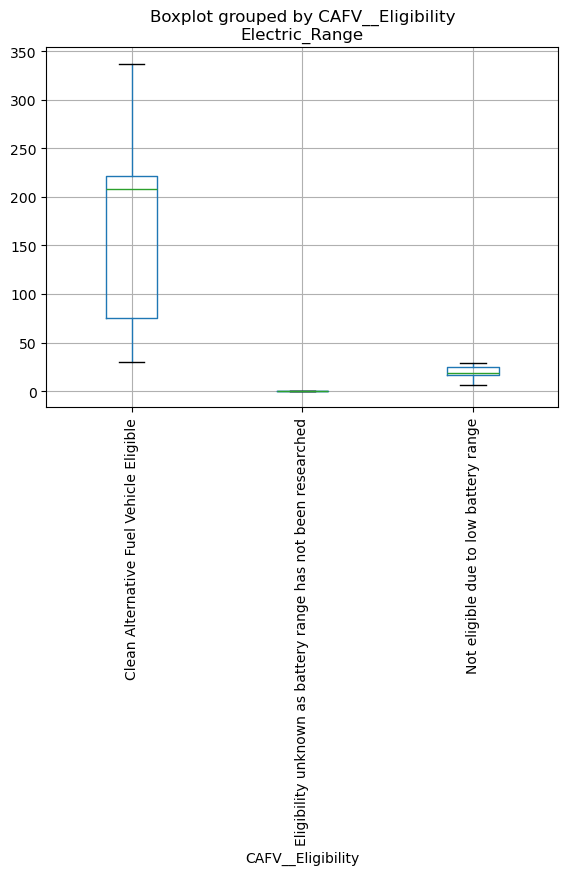

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df.boxplot(by="CAFV__Eligibility", column=['Electric_Range'])

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [168]:
! pip install plotly

In [169]:
import plotly.express as px


In [171]:
ev_count_by_state = df.groupby('State').size().reset_index(name='Number_of_EV_Vehicles')
ev_count_by_state.sort_values(by="Number_of_EV_Vehicles", ascending=False)

,State,Number_of_EV_Vehicles
42,WA,112214
4,CA,76
41,VA,36
18,MD,25
39,TX,14
5,CO,9
29,NV,8
23,NC,7
10,GA,7
3,AZ,6


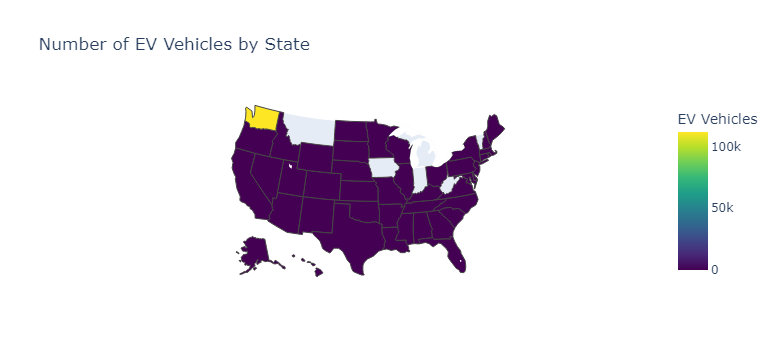

In [172]:
fig = px.choropleth(ev_count_by_state,
                    locations='State',
                    locationmode="USA-states",
                    color='Number_of_EV_Vehicles',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    labels={'Number_of_EV_Vehicles': 'EV Vehicles'},
                    title='Number of EV Vehicles by State',
                    hover_data={'State':True, 'Number_of_EV_Vehicles':True}
                    )

# Show the map
fig.show()

In [173]:
ev_count_by_pincode = df.groupby(['Postal_Code','State']).size().reset_index(name='Number_of_EV_Vehicles')
ev_count_by_pincode

,Postal_Code,State,Number_of_EV_Vehicles
0,1730,MA,1
1,1731,MA,1
2,1824,MA,1
3,2842,RI,1
4,3804,NH,1
...,...,...,...
766,99361,WA,8
767,99362,WA,247
768,99402,WA,9
769,99403,WA,39


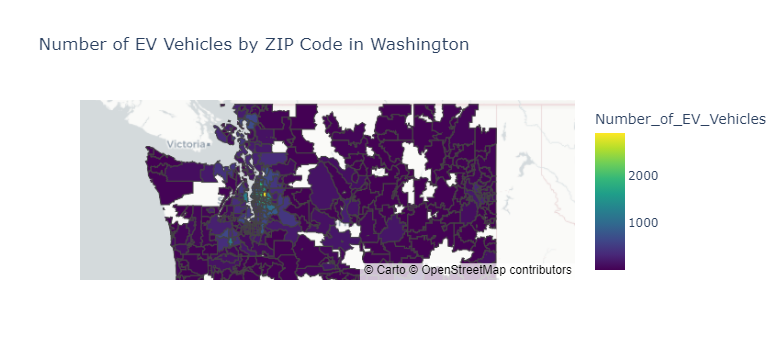

In [175]:
state_data = ev_count_by_pincode[ev_count_by_pincode['State'] == 'WA']

# Create a choropleth map showing EV vehicles by ZIP code
fig = px.choropleth_mapbox(state_data,
                           geojson="https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json",  # Washington state ZIP code geojson
                           locations='Postal_Code',
                           color='Number_of_EV_Vehicles',
                           featureidkey="properties.ZCTA5CE10",  
                           mapbox_style="carto-positron",
                           zoom=5,  
                           center={"lat": 47.7511, "lon": -120.7401},  
                           title="Number of EV Vehicles by ZIP Code in Washington",
                           color_continuous_scale="Viridis",
                           hover_data=['Number_of_EV_Vehicles']  
                          )

# Show the map
fig.show()

In [180]:
df_wa = df[df['State'] == 'WA']

# Group by 'Postal Code' and 'Model Year' to count the number of EV vehicles per ZIP code and year
ev_count_by_zip_animated = df_wa.groupby(['Postal_Code', 'Model_Year']).size().reset_index(name='Number_of_EV_Vehicles')
 

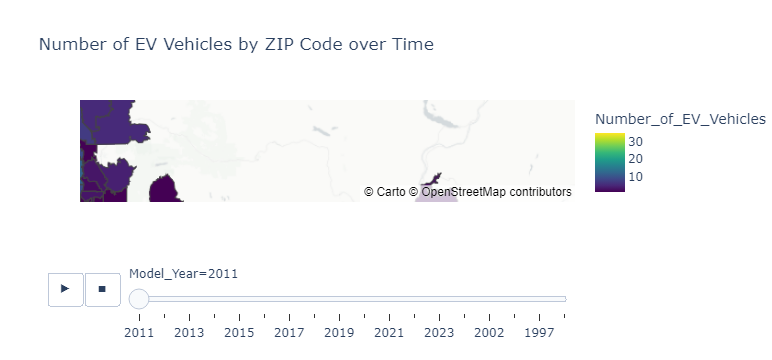

In [181]:
fig = px.choropleth_mapbox(ev_count_by_zip_animated,
                           geojson="https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json",  # GeoJSON for Washington ZIP codes
                           locations='Postal_Code',
                           color='Number_of_EV_Vehicles',
                           featureidkey="properties.ZCTA5CE10",  
                           mapbox_style="carto-positron",
                           zoom=7,  
                           center={"lat": 47.7511, "lon": -120.7401},  
                           animation_frame='Model_Year', 
                           title="Number of EV Vehicles by ZIP Code over Time",
                           color_continuous_scale="Viridis",
                           hover_data=['Postal_Code', 'Number_of_EV_Vehicles']
                          )

# Show the map
fig.show()

In [182]:
ev_make_by_year = df.groupby(['Make', 'Model_Year']).size().reset_index(name='Number_of_Vehicles')

# Display the resulting DataFrame for verification
print(ev_make_by_year)

      Make  Model_Year  Number_of_Vehicles
0     AUDI        2016                 214
1     AUDI        2017                 187
2     AUDI        2018                 174
3     AUDI        2019                 392
4     AUDI        2020                 224
..     ...         ...                 ...
200  VOLVO        2019                 190
201  VOLVO        2020                 162
202  VOLVO        2021                 580
203  VOLVO        2022                 882
204  VOLVO        2023                  21

[205 rows x 3 columns]


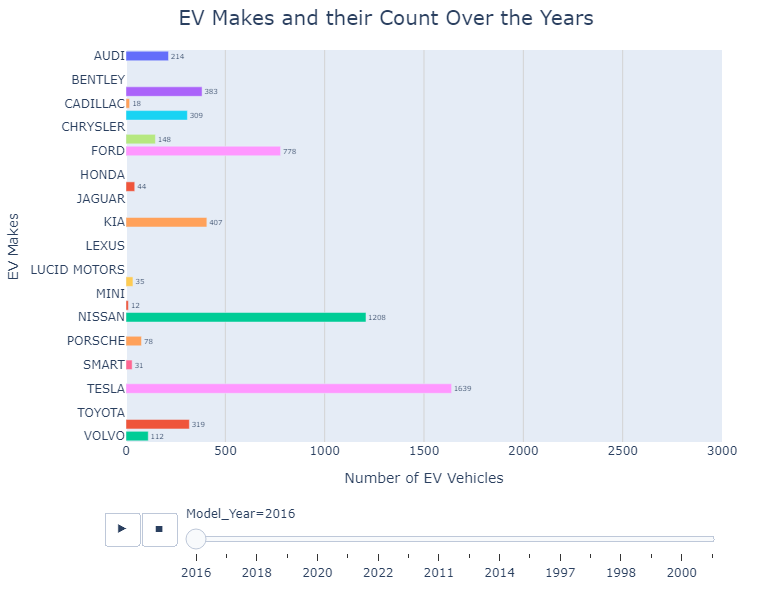

In [184]:
import plotly.express as px

# Create the animated racing bar plot with annotations
fig = px.bar(ev_make_by_year,
             y='Make',  
             x='Number_of_Vehicles', 
             color='Make', 
             animation_frame='Model_Year',  
             orientation='h',  
             title='EV Makes and their Count Over the Years',
             labels={'Number_of_Vehicles': 'Number of EV Vehicles'},
             range_x=[0, 3000]
            )

# Update traces for displaying values
fig.update_traces(texttemplate='%{x}', 
                  textposition='outside',  
                  textfont_size=16)  

# Adjust the layout for improved visibility and emphasis on movement
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='LightGray'),  
    yaxis_title='EV Makes',
    xaxis_title='Number of EV Vehicles',
    showlegend=False,  
    title_x=0.5,  
    title_font=dict(size=20), 
    margin=dict(l=50, r=50, t=50, b=50),
    width=800, 
    height=600  
)

# Show the plot
fig.show()